In [1]:
# Netflix Data Analysis
# Author: SASAPU SAI SANTOSH
# Objective: Perform EDA on Netflix dataset to gain insights into titles, genres, releases and more.

In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Dataset
data = pd.read_csv(r"C:\Netflix_Data_Analysis\Data\netflix_titles.csv") 

In [4]:
# 1. Data Overview

In [5]:
data.head()                                  # Preview of top-5 records of the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
data.tail()                                 # Preview of bottom-5 records of the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [7]:
# Dataset information
data.shape                                      # to get the No. of Rows and Columns

(8807, 12)

In [8]:
data.size                                      # to get No. of total values(elements) in the dataset

105684

In [9]:
data.columns                                   # to get the each Column Name in the dataset

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
data.dtypes                                   # to get the data-type of each column

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
#Check for Duplicate Records
data[data.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [13]:
data.drop_duplicates(inplace=True)        # Drop duplicates if it was there

In [14]:
# Check for missing values
data.isnull().sum()                      # To get the count of Null values in each column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

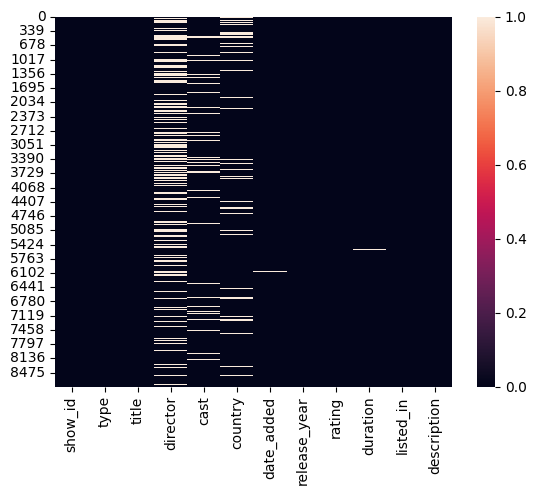

In [15]:
# Heatmap of missing values
sns.heatmap(data.isnull())

In [16]:
# 2. Data Cleaning

In [17]:
# Convert 'date_added' to datetime
data['Netflix_Release_Year'] = pd.to_datetime(data['date_added'], errors="coerce")

In [18]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Netflix_Release_Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24


In [19]:
# 3. General Analysis / Trends

In [20]:
### Q1. In which year highest number of the TV Shows & Movies were released in Netflix?

In [21]:
data['Netflix_Release_Year'] = pd.to_datetime(data['date_added'], errors="coerce")

In [22]:
data.dtypes

show_id                         object
type                            object
title                           object
director                        object
cast                            object
country                         object
date_added                      object
release_year                     int64
rating                          object
duration                        object
listed_in                       object
description                     object
Netflix_Release_Year    datetime64[ns]
dtype: object

<Axes: xlabel='Netflix_Release_Year'>

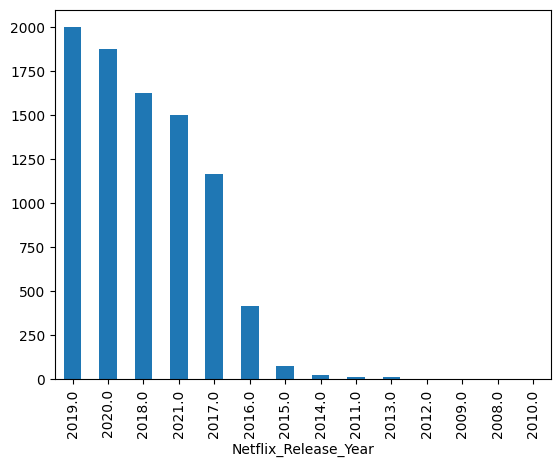

In [23]:
data['Netflix_Release_Year'].dt.year.value_counts().plot(kind='bar')

In [24]:
### Q2. Number of Movies/Shows releases per every year in Netflix?

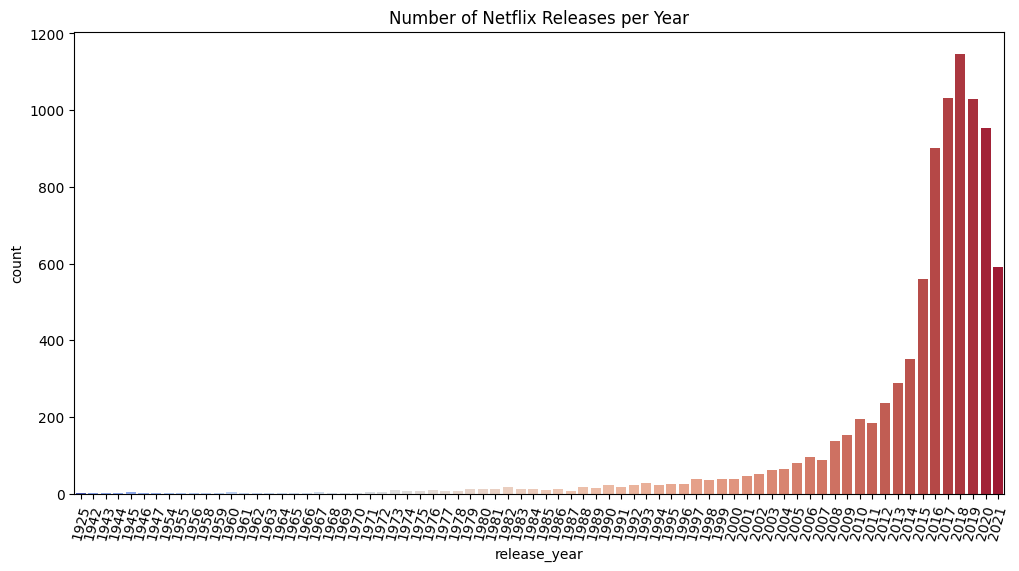

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x='release_year', hue='release_year', data=data, palette='coolwarm', legend=False)
plt.xticks(rotation=75)
plt.title('Number of Netflix Releases per Year')
plt.show()

In [26]:
### Q3. How many Movies and TV Shows are available on Netflix? Show the distribution in a simple bar chart?

In [27]:
data.groupby('type').type.count()              # To group all unique items of a column and show their count

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

<Axes: xlabel='count', ylabel='type'>

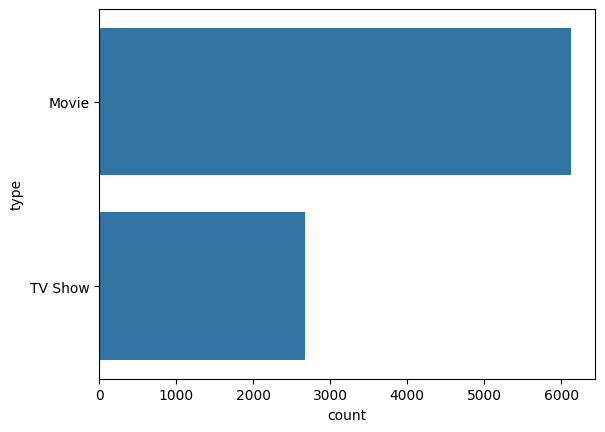

In [28]:
sns.countplot(data['type'])    

In [29]:
### Q4. Identify Top 10 most common Genres of all time on Netflix Genres?

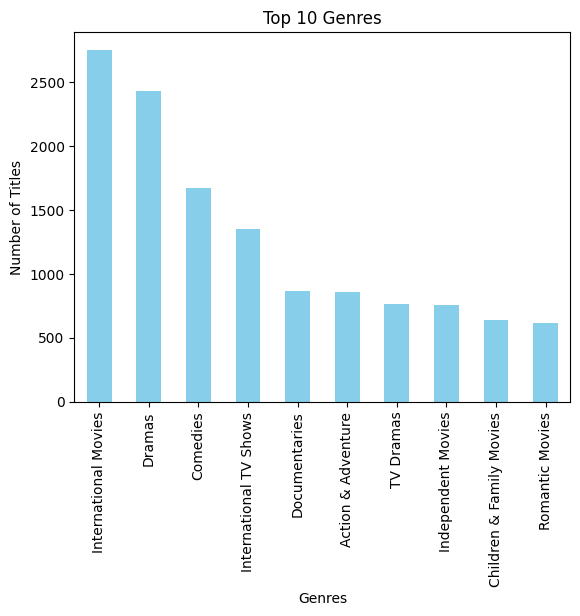

In [30]:
data_genres = data.assign(genre=data['listed_in'].str.split(', ')).explode('genre')
top_genres = data_genres['genre'].value_counts().head(10)

top_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Titles')
plt.show()

In [31]:
### Q5. Identify Genre trends for every year on Netflix?

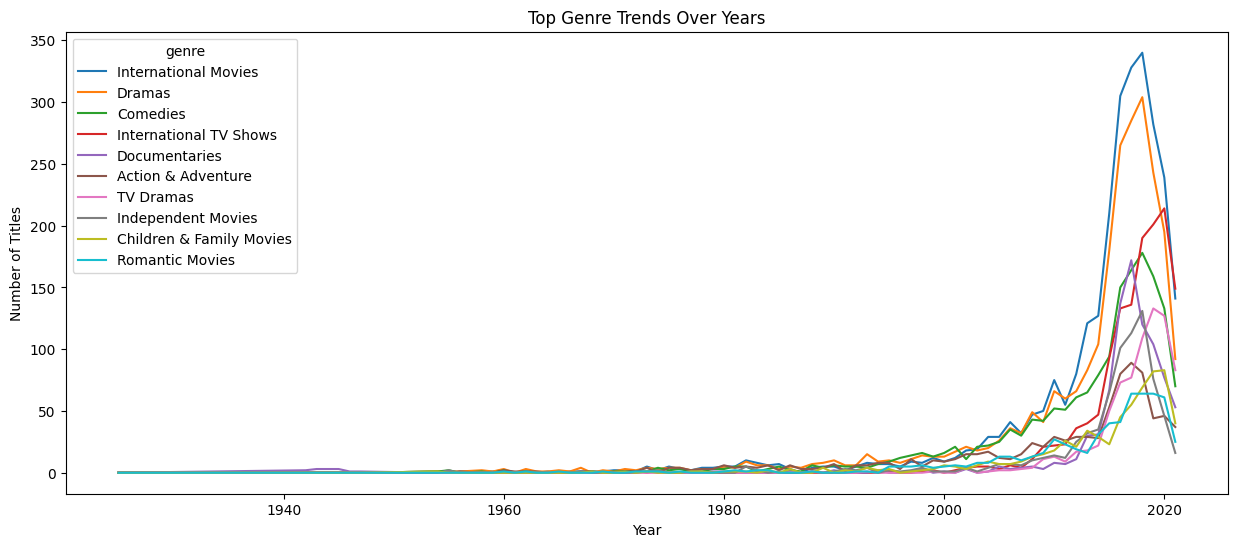

In [32]:
genre_year = data_genres.groupby(['release_year','genre']).size().unstack(fill_value=0)
genre_year[top_genres.index].plot(figsize=(15,6))
plt.title('Top Genre Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

In [33]:
# 4. Specific Insights

In [34]:
### Q6. Using the Netflix dataset, find the 'Show ID' and 'Director' for the show of "House of Cards"?

In [35]:
data[data['title'].isin(['House of Cards'])]       #  To show all records of a particular item in any column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Netflix_Release_Year
1059,s1060,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"April 14, 2021",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...,2021-04-14


In [36]:
### Q7. Movies Released in 2020 Year?

In [37]:
data['Year'] = data['Netflix_Release_Year'].dt.year

In [38]:
data[ (data['type'] == 'Movie') & (data['Year']==2020) ]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Netflix_Release_Year,Year
1470,s1471,Movie,Alaska Is a Drag,Shaz Bennett,"Martin L. Washington Jr., Maya Washington, Mat...",United States,"December 31, 2020",2017,TV-MA,83 min,"Dramas, LGBTQ Movies","Tormented by bullies, an aspiring drag star wo...",2020-12-31,2020.0
1471,s1472,Movie,Best of Stand-Up 2020,NaN,"Jerry Seinfeld, Leslie Jones, Taylor Tomlinson...",NaN,"December 31, 2020",2020,TV-MA,77 min,Stand-Up Comedy,"From Jerry Seinfeld to Leslie Jones, Kevin Har...",2020-12-31,2020.0
1472,s1473,Movie,Bobby Jasoos,Samar Shaikh,"Vidya Balan, Ali Fazal, Supriya Pathak, Tanvi ...",India,"December 31, 2020",2014,TV-14,116 min,"Comedies, Dramas, International Movies",With unlimited determination and zero field ex...,2020-12-31,2020.0
1474,s1475,Movie,Tarung Sarung,Archie Hekagery,"Panji Zoni, Yayan Ruhian, Maizura, Cemal Faruk...",Indonesia,"December 31, 2020",2020,TV-PG,116 min,"Action & Adventure, Dramas, Faith & Spirituality","Wealthy and spoiled, a young man finds somethi...",2020-12-31,2020.0
1475,s1476,Movie,Too Handsome to Handle,Sabrina Rochelle Kalangie,"Ari Irham, Nikita Willy, Calvin Jeremy, Rachel...",Indonesia,"December 31, 2020",2019,TV-14,106 min,"Comedies, Dramas, International Movies",Wary of the effects of his good looks on other...,2020-12-31,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8742,s8743,Movie,Wild Wild West,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,"January 1, 2020",1999,PG-13,106 min,"Action & Adventure, Comedies, Sci-Fi & Fantasy","Armed with an ingenious arsenal, two top-notch...",2020-01-01,2020.0
8743,s8744,Movie,Wildlife,Paul Dano,"Carey Mulligan, Ed Oxenbould, Bill Camp, Jake ...",United States,"September 1, 2020",2018,PG-13,105 min,"Dramas, Independent Movies",A teen’s life in 1960 Montana grows complicate...,2020-09-01,2020.0
8745,s8746,Movie,Willy Wonka & the Chocolate Factory,Mel Stuart,"Gene Wilder, Jack Albertson, Peter Ostrum, Roy...","United States, East Germany, West Germany","January 1, 2020",1971,G,100 min,"Children & Family Movies, Classic Movies, Come...",Zany Willy Wonka causes a stir when he announc...,2020-01-01,2020.0
8764,s8765,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...,2020-01-01,2020.0


In [39]:
### Q8. In how many Movies/shows Tom Cruise was cast ?

In [40]:
data[data['cast'] == 'Tom Cruise']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Netflix_Release_Year,Year


In [41]:
data_new = data.dropna()

In [42]:
data_new.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Netflix_Release_Year,Year
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,2021.0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24,2021.0


In [43]:
data_new[data_new['cast'].str.contains('Tom Cruise')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Netflix_Release_Year,Year
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,"August 1, 2021",1999,R,189 min,"Dramas, Independent Movies","Through chance, history and divine interventio...",2021-08-01,2021.0
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"March 1, 2021",1988,R,134 min,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki...",2021-03-01,2021.0


In [44]:
### Q9. Top 10 Directors who gave the highest number of TV Shows & Movies to Netflix ?

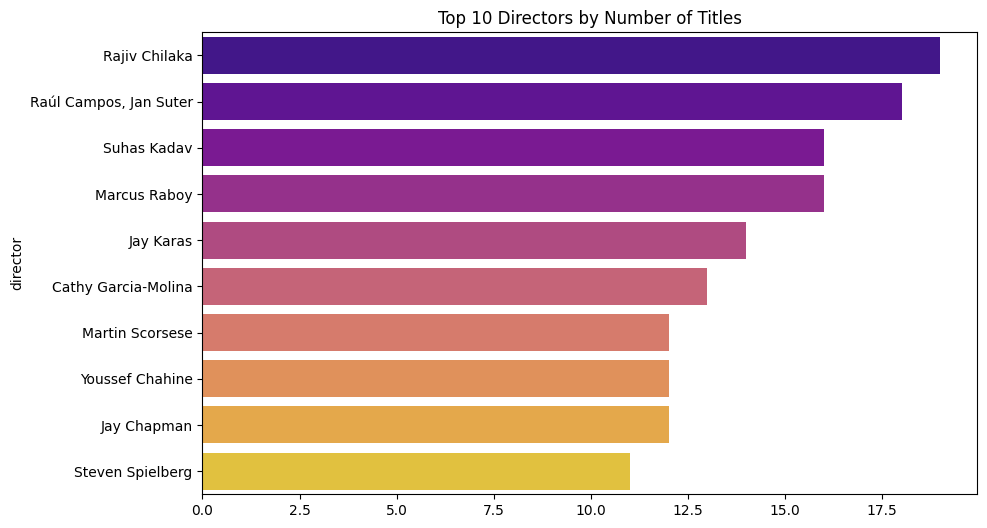

In [45]:
top_directors = data['director'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, hue=top_directors.index, palette='plasma', legend=False)
plt.title('Top 10 Directors by Number of Titles')
plt.show()

In [46]:
### Q10. Identify Top 5 Countries Producing most Netflix Content that produce the most content on Netflix?

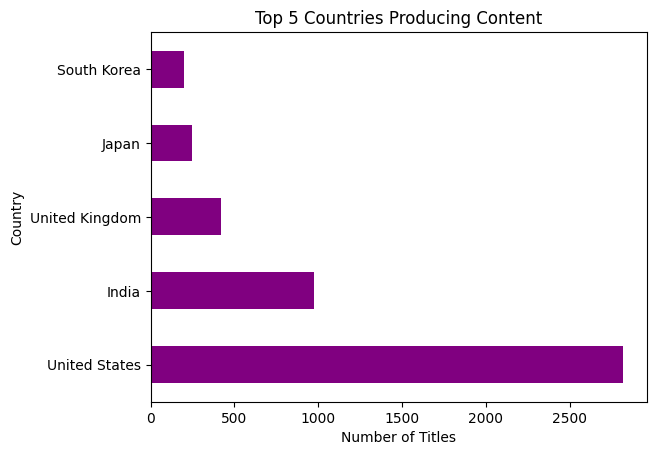

In [47]:
top_countries = data['country'].value_counts().head(5)
top_countries.plot(kind='barh', color='purple')
plt.title('Top 5 Countries Producing Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

In [48]:
### Q11. Count of content per rating?

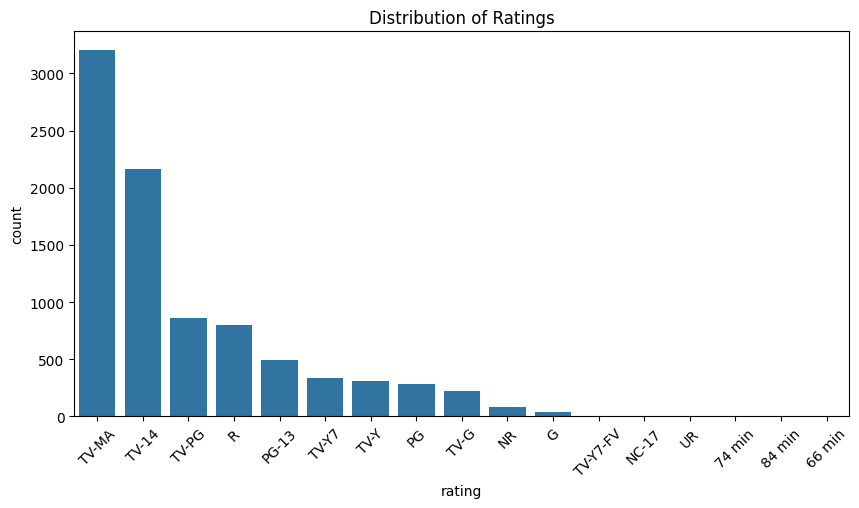

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(x='rating', data=data, order=data['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Ratings')
plt.show()

In [50]:
# 5. Country / Region Analysis

In [51]:
### Q12. TV Shows Released only in India?

In [52]:
data[ (data['type']=='TV Show') & (data['country']=='India') ] ['title']

4                             Kota Factory
39                            Chhota Bheem
50                           Dharmakshetra
66           Raja Rasoi Aur Anya Kahaniyan
69          Stories by Rabindranath Tagore
                       ...                
8173                             Thackeray
8235                           The Calling
8321    The Golden Years with Javed Akhtar
8349                The House That Made Me
8775                       Yeh Meri Family
Name: title, Length: 79, dtype: object

In [53]:
### Q13. What are the earliest 10 Netflix movies?

In [54]:
data_sorted = data.sort_values(by='release_year')
data_sorted[['title','release_year','type']].head(10)

,title,release_year,type
4250,Pioneers: First Women Filmmakers*,1925,TV Show
7790,Prelude to War,1942,Movie
8205,The Battle of Midway,1942,Movie
8739,Why We Fight: The Battle of Russia,1943,Movie
8763,WWII: Report from the Aleutians,1943,Movie
8660,Undercover: How to Operate Behind Enemy Lines,1943,Movie
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944,Movie
8436,The Negro Soldier,1944,Movie
8640,Tunisian Victory,1944,Movie
7219,Know Your Enemy - Japan,1945,Movie


In [55]:
# 6. Conclusion

In [56]:
"""
Key Insights:
1. 2019 had the highest number of Netflix releases.
2. Movies are slightly more prevalent than TV Shows.
3. Rajiv Chilaka is among top directors on Netflix.
4. US produces the most Netflix content, followed by India and UK.
5. International Movies, Drama and Comedies dominate Netflix genres.
6. Tom Cruise cast in 2 Movies/shows (from dataset).
7. Revenue has shown consistent growth since 2016  
8. Drama and Action are the highest-grossing genres  
9. The US, India, and the UK are top revenue contributors  
10. Mobile viewership has grown by 25% year-over-year

"""

'\nKey Insights:\n1. 2019 had the highest number of Netflix releases.\n2. Movies are slightly more prevalent than TV Shows.\n3. Rajiv Chilaka is among top directors on Netflix.\n4. US produces the most Netflix content, followed by India and UK.\n5. International Movies, Drama and Comedies dominate Netflix genres.\n6. Tom Cruise cast in 2 Movies/shows (from dataset).\n7. Revenue has shown consistent growth since 2016  \n8. Drama and Action are the highest-grossing genres  \n9. The US, India, and the UK are top revenue contributors  \n10. Mobile viewership has grown by 25% year-over-year\n\n'